In [10]:
import zipfile
import shapely.geometry as shpg
import salem
import numpy as np
import pandas as pd
import geopandas as gpd
import glob
import matplotlib.pyplot as plt
import xarray as xr

In [5]:
files = glob.glob('geology-optimized*.nc')

In [6]:
files

['geology-optimizedC3DF.nc',
 'geology-optimizedC7DF.nc',
 'geology-optimizedC11DF.nc',
 'geology-optimizedC10DF.nc',
 'geology-optimizedC2DF.nc',
 'geology-optimizedC6DF.nc',
 'geology-optimizedC8DF.nc',
 'geology-optimizedC12DF.nc',
 'geology-optimizedC4DF.nc',
 'geology-optimizedC1DF.nc',
 'geology-optimizedC5DF.nc',
 'geology-optimizedC9DF.nc']

In [8]:
gdf = gpd.GeoDataFrame()

# First round for the main file
for i, f in enumerate(files):
    gdf.loc[i, 'rgi_reg'] = f'11'
    gdf.loc[i, 'file_id'] = f.replace('geology-optimized', '').replace('.nc', '')
    gdf.loc[i, 'thickness'] = f
        
gdf = gdf.sort_values(by=['rgi_reg', 'thickness'])
gdf = gdf.reset_index(drop=True)

gdf

rgi_reg file_id                  thickness
0       11   C10DF  geology-optimizedC10DF.nc
1       11   C11DF  geology-optimizedC11DF.nc
2       11   C12DF  geology-optimizedC12DF.nc
3       11    C1DF   geology-optimizedC1DF.nc
4       11    C2DF   geology-optimizedC2DF.nc
5       11    C3DF   geology-optimizedC3DF.nc
6       11    C4DF   geology-optimizedC4DF.nc
7       11    C5DF   geology-optimizedC5DF.nc
8       11    C6DF   geology-optimizedC6DF.nc
9       11    C7DF   geology-optimizedC7DF.nc
10      11    C8DF   geology-optimizedC8DF.nc
11      11    C9DF   geology-optimizedC9DF.nc

In [17]:
for i, s in gdf.iterrows():
    with xr.open_dataset(s.thickness) as ds:
        ds.attrs['pyproj_srs'] = 'EPSG:32632'
        gdf.loc[i, 'geometry'] = ds.salem.grid.extent_as_polygon(salem.wgs84)

In [25]:
list(ds.variables)

['y',
 'x',
 'thkobs',
 'thkinit',
 'lon',
 'lat',
 'usurfobs',
 'uvelsurfobs',
 'vvelsurfobs',
 'icemaskobs',
 'strflowctrl',
 'arrhenius',
 'slidingco',
 'thk',
 'usurf',
 'icemask',
 'divflux']

In [18]:
gdf.crs = salem.wgs84.crs.to_wkt()

In [19]:
gdf = gpd.GeoDataFrame(gdf)

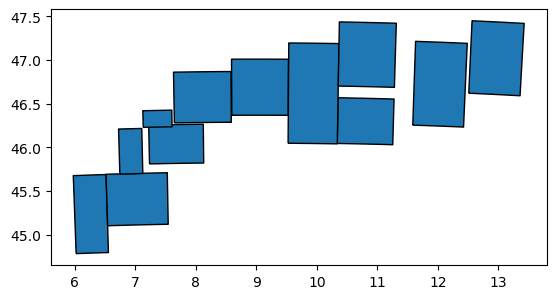

In [21]:
gdf.plot(ec='k');

In [22]:
import zipfile
import tarfile

def open_zip_shapefile(fpath, exclude_pattern='', include_pattern=''):
    with zipfile.ZipFile(fpath, "r") as z:
        for f in z.filelist:
            if f.filename.endswith('.shp'):
                if exclude_pattern and exclude_pattern in f.filename:
                    continue
                if include_pattern and include_pattern not in f.filename:
                    continue
                fname = f.filename
                
    return gpd.read_file('zip://' + fpath + '/' + fname)

In [23]:
out_dir = 'cook23_thickness_lookup_shp_20240815'
gdf.to_file(out_dir)
import shutil
shutil.make_archive(f'{out_dir}', 'zip', out_dir)
shutil.rmtree(out_dir)

In [7]:
# for reg in gdf.rgi_reg.unique():
#     print(reg)
#     print(gdf.loc[gdf.rgi_reg == reg][['file_id']])
#     print('---------------------------------------------')

In [8]:
# remove duplicate file
gdf = gdf.loc[~gdf.file_id.isin(['RGI-17.7_2021July23'])]
gdf = gdf.reset_index(drop=True)

In [9]:
gdf

rgi_reg              file_id  \
0       01   RGI-1.1_2021July01   
1       01   RGI-1.2_2021July01   
2       01   RGI-1.3_2021July01   
3       01   RGI-1.4_2021July08   
4       01   RGI-1.5_2021July01   
..     ...                  ...   
56      19  RGI-19.1_2021July09   
57      19  RGI-19.2_2021July09   
58      19  RGI-19.3_2021July09   
59      19  RGI-19.4_2021July09   
60      19  RGI-19.5_2021July09   

                                            thickness  \
0    thickness/RGI-1/THICKNESS_RGI-1.1_2021July01.tif   
1    thickness/RGI-1/THICKNESS_RGI-1.2_2021July01.tif   
2    thickness/RGI-1/THICKNESS_RGI-1.3_2021July01.tif   
3    thickness/RGI-1/THICKNESS_RGI-1.4_2021July08.tif   
4    thickness/RGI-1/THICKNESS_RGI-1.5_2021July01.tif   
..                                                ...   
56  thickness/RGI-19/THICKNESS_RGI-19.1_2021July09...   
57  thickness/RGI-19/THICKNESS_RGI-19.2_2021July09...   
58  thickness/RGI-19/THICKNESS_RGI-19.3_2021July09...   
59  thickness/RGI-19/THICKNESS_RGI-19.4_2021July09...   
60  thickness/RGI-19/THICKNESS_RGI-19.5_2021July09...   

                                                  err  \
0   thickness/RGI-1/ERRTHICKNESS_RGI-1.1_2021July0...   
1   thickness/RGI-1/ERRTHICKNESS_RGI-1.2_2021July0...   
2   thickness/RGI-1/ERRTHICKNESS_RGI-1.3_2021July0...   
3   thickness/RGI-1/ERRTHICKNESS_RGI-1.4_2021July0...   
4   thickness/RGI-1/ERRTHICKNESS_RGI-1.5_2021July0...   
..                                                ...   
56  thickness/RGI-19/ERRTHICKNESS_RGI-19.1_2021Jul...   
57  thickness/RGI-19/ERRTHICKNESS_RGI-19.2_2021Jul...   
58  thickness/RGI-19/ERRTHICKNESS_RGI-19.3_2021Jul...   
59  thickness/RGI-19/ERRTHICKNESS_RGI-19.4_2021Jul...   
60  thickness/RGI-19/ERRTHICKNESS_RGI-19.5_2021Jul...   

                                             geometry  
0   POLYGON ((-155.21725 63.25339, -155.21628 63.2...  
1   POLYGON ((-167.27902 55.62410, -167.27822 55.6...  
2   POLYGON ((-160.52884 60.45355, -160.52793 60.4...  
3   POLYGON ((-156.64318 68.20145, -156.64202 68.2...  
4   POLYGON ((-149.06528 69.27784, -149.06403 69.2...  
..                                                ...  
56  POLYGON ((-37.96839 -54.01246, -37.96763 -54.0...  
57  POLYGON ((68.78110 -49.03347, 68.78179 -49.033...  
58  POLYGON ((73.25417 -52.98885, 73.25491 -52.988...  
59  POLYGON ((-46.12427 -60.47823, -46.12336 -60.4...  
60  POLYGON ((-56.51195 -62.81183, -56.51102 -62.8...  

[61 rows x 5 columns]

In [12]:
import zipfile
import tarfile

def open_zip_shapefile(fpath, exclude_pattern='', include_pattern=''):
    with zipfile.ZipFile(fpath, "r") as z:
        for f in z.filelist:
            if f.filename.endswith('.shp'):
                if exclude_pattern and exclude_pattern in f.filename:
                    continue
                if include_pattern and include_pattern not in f.filename:
                    continue
                fname = f.filename
                
    return gpd.read_file('zip://' + fpath + '/' + fname)

# This could be made lazy to speed up imports
data_dir = '/home/www/fmaussion/misc/rgi7_data'

maps = {}
fpath = f'{data_dir}/l0_support_data/ne_10m_coastline.zip'
maps['coast_hr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_50m_coastline.zip'
maps['coast_mr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_110m_coastline.zip'
maps['coast_lr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_10m_admin_0_countries.zip'
maps['countries_hr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_50m_admin_0_countries.zip'
maps['countries_mr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_110m_admin_0_countries.zip'
maps['countries_lr'] = open_zip_shapefile(fpath)

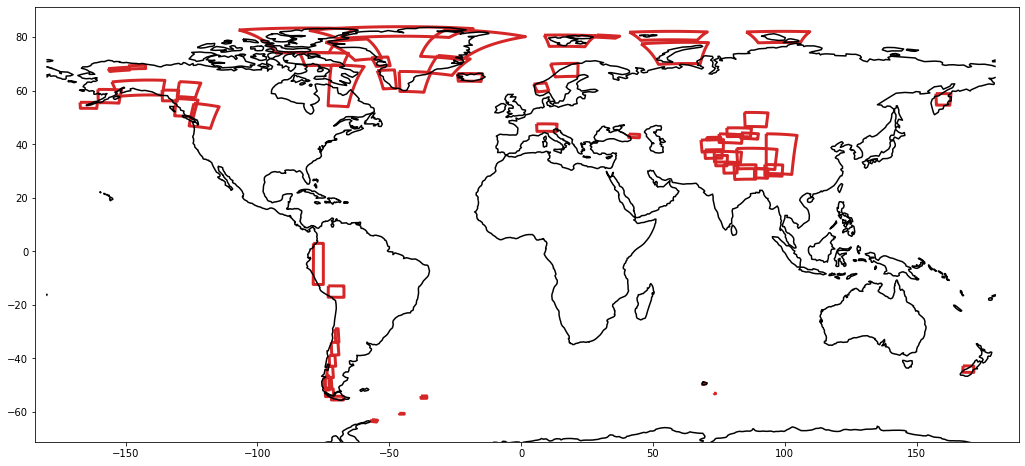

In [13]:
f, ax = plt.subplots(figsize=(18, 8))

gdf.plot(ax=ax, facecolor='none', edgecolor='C3', linewidth=3);
    
ax.autoscale(enable=False, axis='both', tight=True)
maps[f'coast_lr'].plot(ax=ax, facecolor='none', edgecolor='k', aspect=None);

# Alternative solution for "Polygon handles not passing to legend"
# ax.legend(handles=handles, loc=loc);
# if title is None:
#     title = f'RGI{reg:02d}'
# ax.set_title(title)

# if aspect is not None:
#     ax.set_aspect(aspect)

# if savefig:
#     plot_dir = data_dir + f'/l3_rgi7a_plots/RGI{reg:02d}'
#     mkdir(plot_dir)
#     plotname = 'isrgi6_map' if is_rgi6 else 'inventory_map'
#     plt.savefig(plot_dir + f'/{plotname}.png', bbox_inches='tight', dpi=150)

In [14]:
out_dir = 'millan22_thickness_lookup_shp_20220902'
gdf.to_file(out_dir)
import shutil
shutil.make_archive(f'{out_dir}', 'zip', out_dir)
shutil.rmtree(out_dir)

/home/users/fmaussion/.miniconda3/envs/oggm_env_fromlist/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [18]:
import shapely.geometry as shpg
p = shpg.Point(-150, 60)
gdf.contains(p)

0      True
1     False
2     False
3     False
4     False
      ...  
56    False
57    False
58    False
59    False
60    False
Length: 61, dtype: bool

## Check grids:

In [33]:
for i, s in gdf.iterrows():
    g1 = salem.GeoTiff(s['thickness']).grid
    g2 = salem.GeoTiff(s['err']).grid
    
    if g1.nx != g2.nx or g1.ny != g2.ny:
        print(s.file_id + ' has a different grid size for thickness and error')
        continue
    
    if g1.x0 != g2.x0 or g1.y0 != g2.y0:
        print(s.file_id + ' has different coordinates for thickness and error')
        continue
    
    if g1.dx != g2.dx or g1.dy != g2.dy:
        print(s.file_id + ' has different grid resolution for thickness and error')
        continue

RGI-1.1_2021July01 has a different grid size for thickness and error
RGI-5.1_2022February24 has different coordinates for thickness and error
RGI-5.5_2022February24 has a different grid size for thickness and error
RGI-10.1_2021July09 has different coordinates for thickness and error
